In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np


import warnings
warnings.filterwarnings("ignore")

In [33]:
df_1h = pd.read_csv('../train_public/1h/L03.B02_1H.csv')
df_weather = pd.read_csv('../train_public/weather/L03_weather_train.csv')

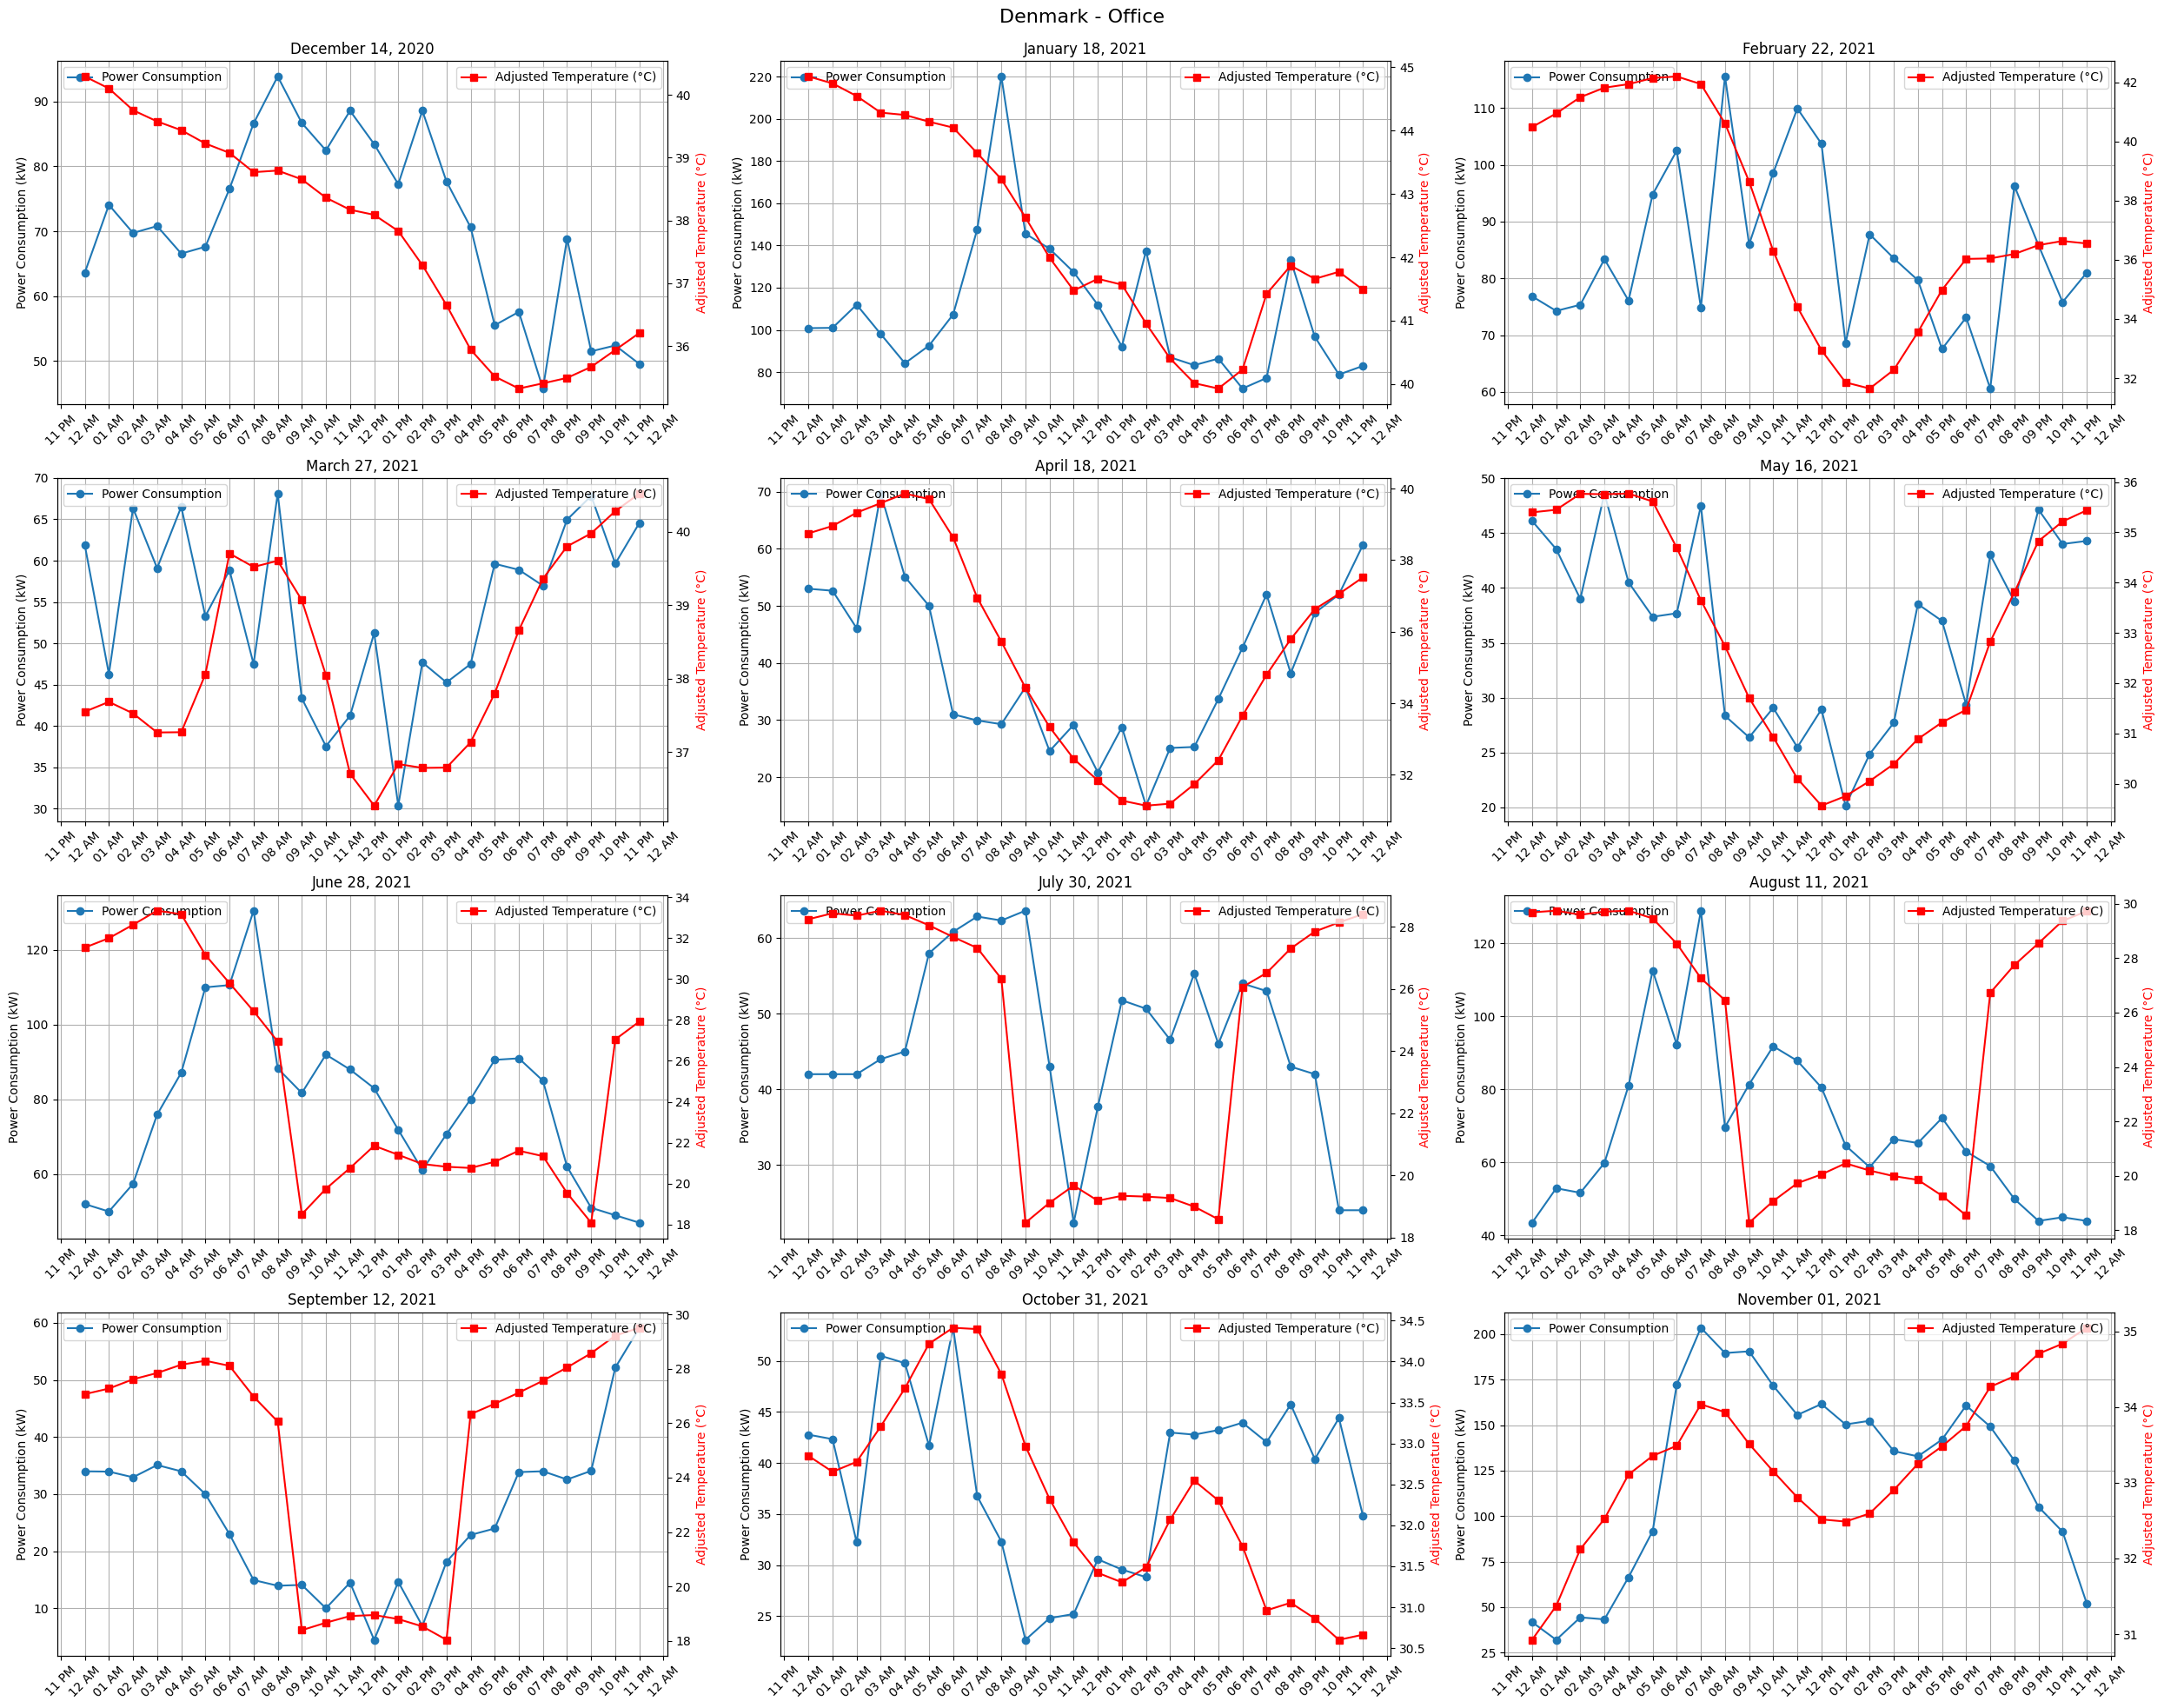

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Assuming df_1h and df_weather are your DataFrames and already loaded

# Convert the 'timestamp' column to datetime for all DataFrames
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# # Filter data to include only between 7 AM and 6 PM
# df_1h = df_1h[df_1h['timestamp'].dt.hour.between(7, 19)]
# df_weather = df_weather[df_weather['timestamp'].dt.hour.between(7, 19)]

# Generate a list of random dates
month_starts = pd.date_range(
    start=df_1h['timestamp'].iloc[0].date(), 
    end=df_1h['timestamp'].iloc[-1].date(), 
    freq='MS'
)

random_dates = []
for start_date in month_starts:
    
    end_date = start_date + pd.offsets.MonthEnd(1)
    random_day = np.random.randint(0, (end_date - start_date).days + 1)
    random_dates.append((start_date + pd.Timedelta(days=random_day)).date())

dates = random_dates[:12]

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each date and create the plot
for i, date in enumerate(dates):
    one_day_hourly = df_1h[df_1h['timestamp'].dt.date == pd.to_datetime(date).date()]
    one_day_weather = df_weather[df_weather['timestamp'].dt.date == pd.to_datetime(date).date()]

    # Invert temperatures outside the 18-20 range
    one_day_weather['adjusted_temp'] = np.where(
        (one_day_weather['air_temperature_at_2m(deg_C)'] < 18) | 
        (one_day_weather['air_temperature_at_2m(deg_C)'] > 22), 
        22 - (one_day_weather['air_temperature_at_2m(deg_C)'] - 22), 
        one_day_weather['air_temperature_at_2m(deg_C)']
    )
    
    # Plot hourly data
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['main_meter(kW)'], marker='o', label='Power Consumption')
    axes[i].set_ylabel('Power Consumption (kW)')
    axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

    # Plot adjusted temperature data
    ax2 = axes[i].twinx()
    ax2.plot(one_day_weather['timestamp'], one_day_weather['adjusted_temp'], marker='s', color='red', label='Adjusted Temperature (°C)')
    # ax2.plot(one_day_weather['timestamp'], one_day_weather['air_temperature_at_2m(deg_C)'], marker='s', color='red', label='Temperature (°C)')
    ax2.set_ylabel('Adjusted Temperature (°C)', color='red')
    ax2.legend(loc='upper right')

    # Limit x-ticks to avoid max ticks error
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set interval to 1 hour
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for the last subplot
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
fig.suptitle('Denmark - Office', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

2020-12-01 00:00:00+00:00 2021-11-15 23:00:00+00:00


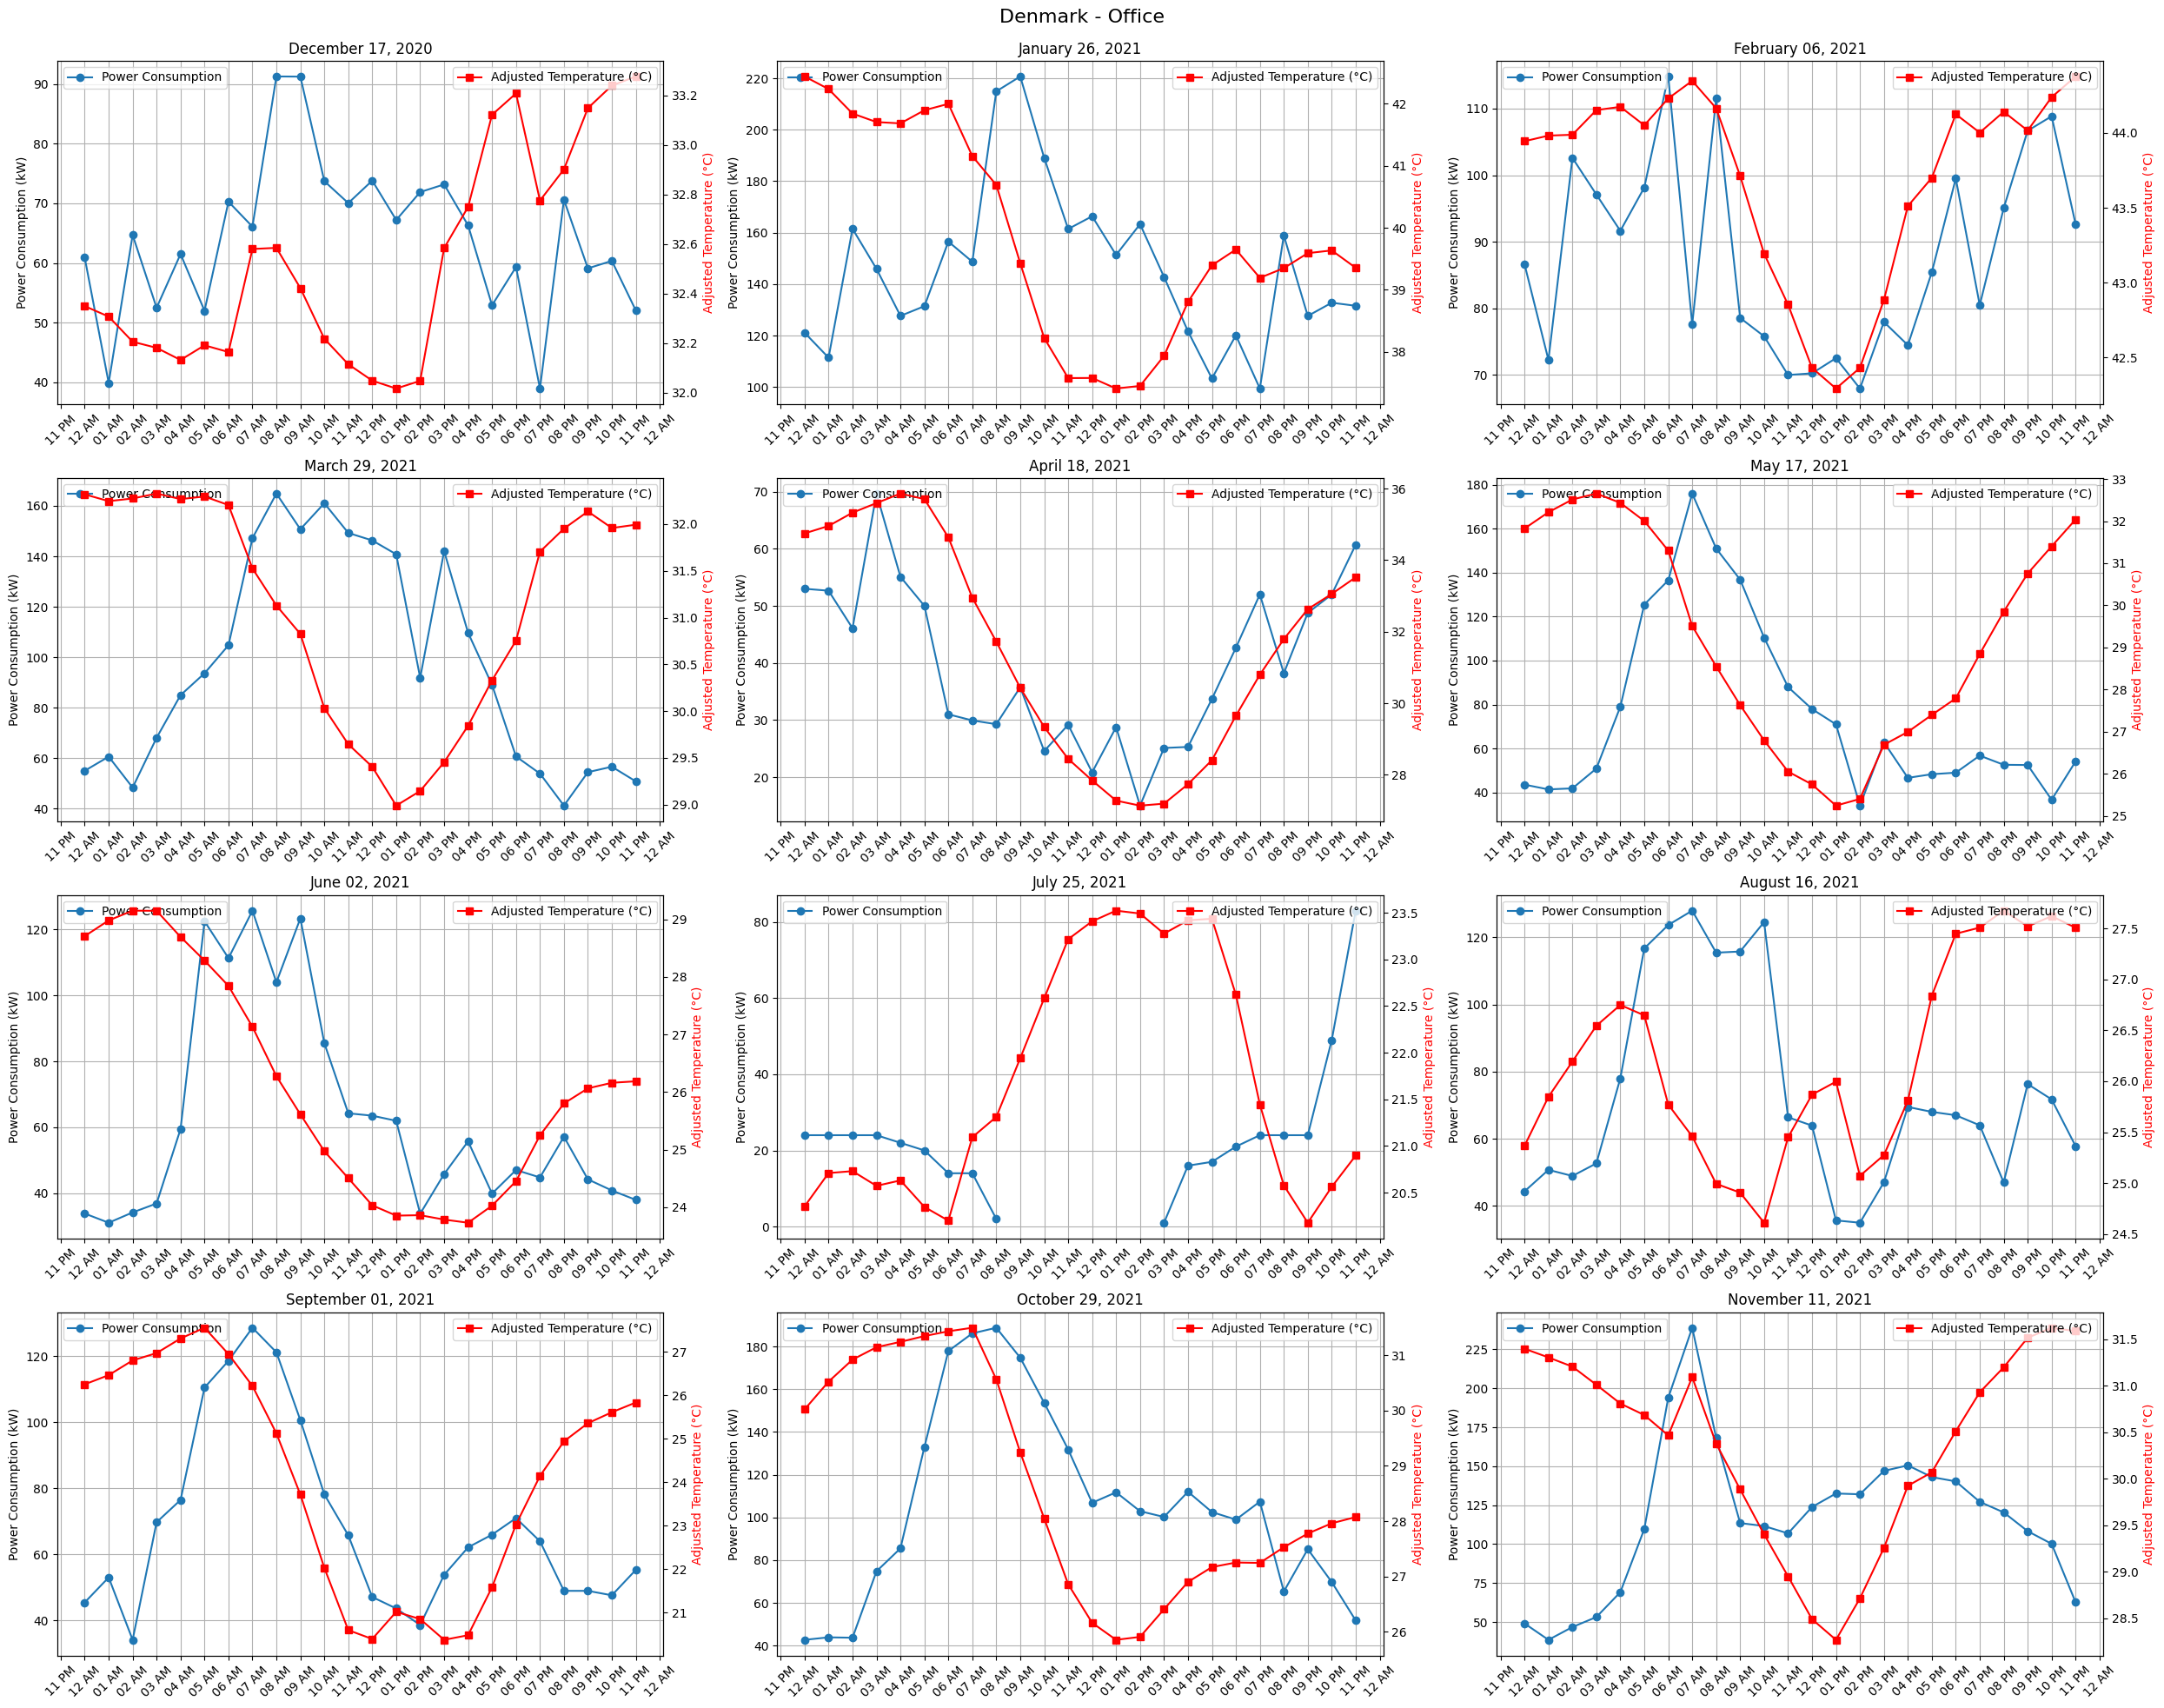

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

df_1h = pd.read_csv('../train_public/1h/L03.B02_1H.csv')
df_weather = pd.read_csv('../train_public/weather/L03_weather_train.csv')

# Convert the 'timestamp' column to datetime for all DataFrames
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])


# # Filter data to include only between 7 AM and 6 PM
# df_1h = df_1h[df_1h['timestamp'].dt.hour.between(7, 19)]
# df_weather = df_weather[df_weather['timestamp'].dt.hour.between(7, 19)]

# Print the last timestamp for debugging purposes
print(df_1h['timestamp'].iloc[0], df_1h['timestamp'].iloc[-1])

# Generate a list of random dates
month_starts = pd.date_range(
    start=df_1h['timestamp'].iloc[0].date(), 
    end=df_1h['timestamp'].iloc[-1].date(), 
    freq='MS'
)

random_dates = []
for start_date in month_starts:
    end_date = start_date + pd.offsets.MonthEnd(1)
    random_day = np.random.randint(0, (end_date - start_date).days + 1)
    random_dates.append((start_date + pd.Timedelta(days=random_day)).date())
dates = random_dates[:13]

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)
axes = axes.flatten()

# Iterate over each date and create the plot
for i, date in enumerate(dates):
    
    one_day_hourly = df_1h[df_1h['timestamp'].dt.date == pd.to_datetime(date).date()]
    one_day_weather = df_weather[df_weather['timestamp'].dt.date == pd.to_datetime(date).date()]

    # Invert temperatures only if they are less than 18
    one_day_weather['adjusted_temp'] = np.where(
        one_day_weather['air_temperature_at_2m(deg_C)'] < 20, 
        20 + (20 - one_day_weather['air_temperature_at_2m(deg_C)']),
        one_day_weather['air_temperature_at_2m(deg_C)']
    )
    
    # Plot hourly data
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['main_meter(kW)'], marker='o', label='Power Consumption')
    axes[i].set_ylabel('Power Consumption (kW)')
    axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

    # Plot adjusted temperature data
    ax2 = axes[i].twinx()
    ax2.plot(one_day_weather['timestamp'], one_day_weather['adjusted_temp'], marker='s', color='red', label='Adjusted Temperature (°C)')
    ax2.set_ylabel('Adjusted Temperature (°C)', color='red')
    ax2.legend(loc='upper right')

    # Limit x-ticks to avoid max ticks error
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set interval to 1 hour
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for the last subplot
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
fig.suptitle('Denmark - Office', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()


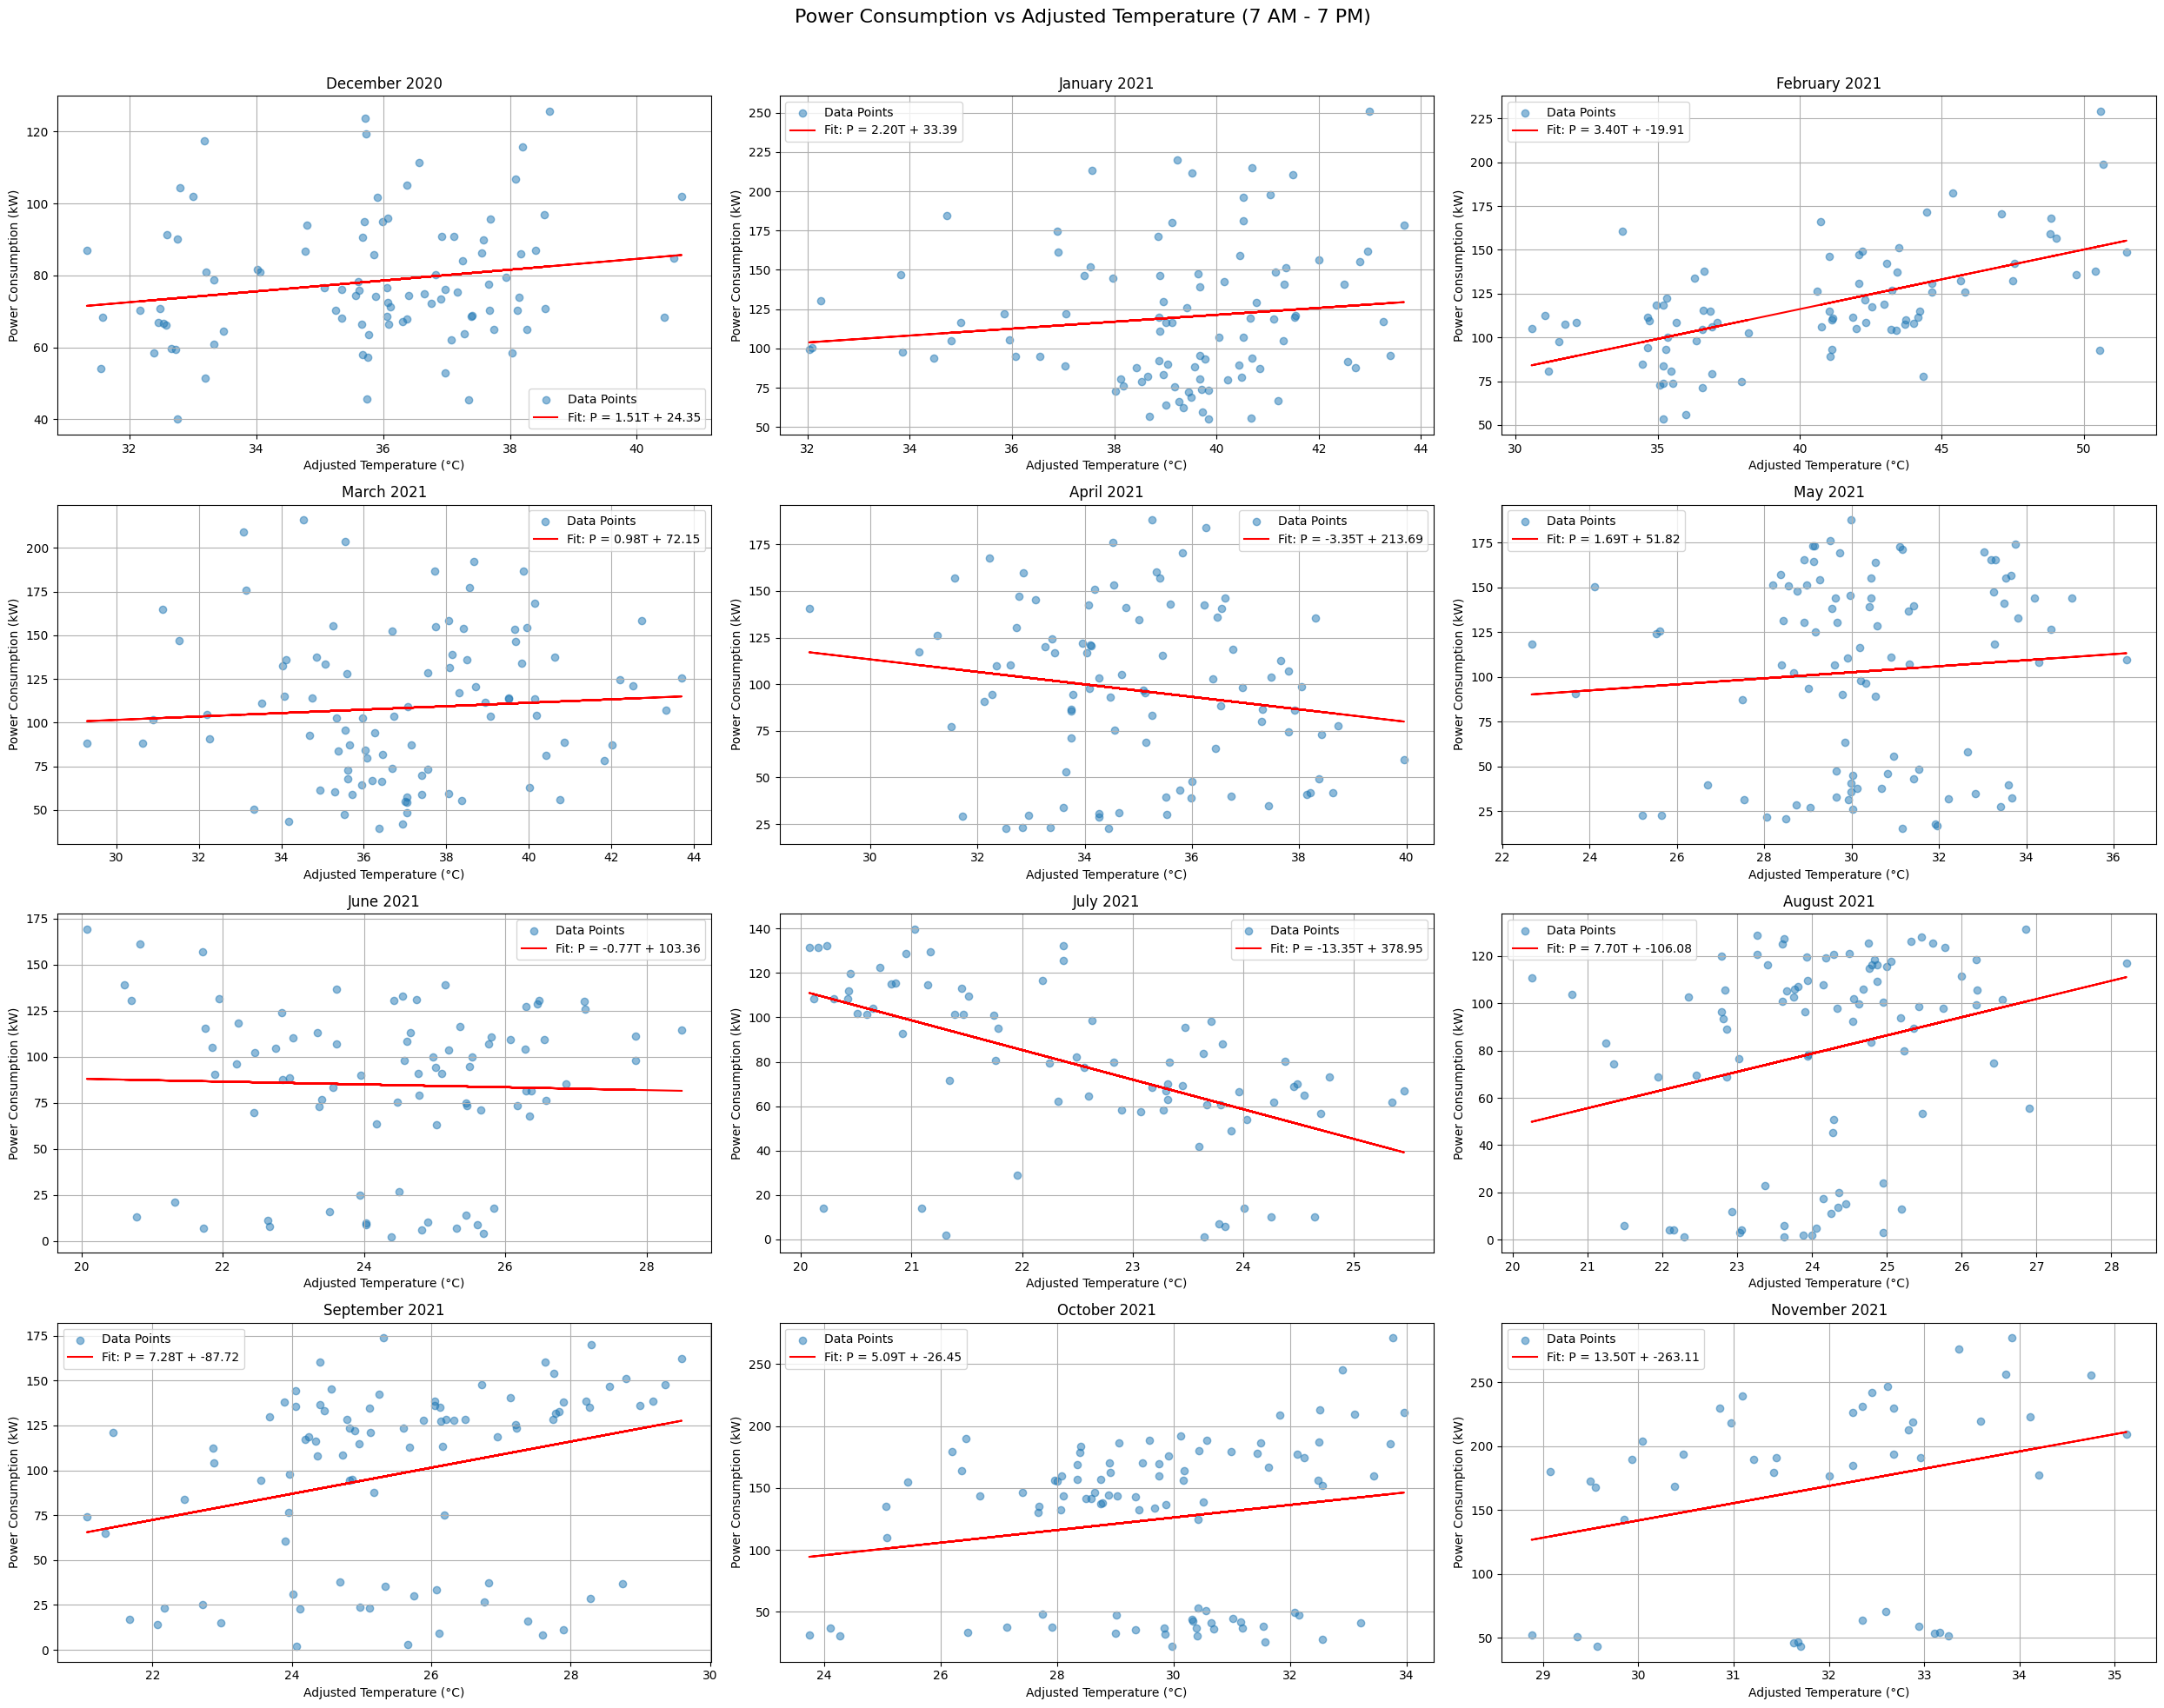

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Ensure 'timestamp' is a datetime object
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Filter data to include only between 7 AM and 6 PM
df_1h = df_1h[df_1h['timestamp'].dt.hour.between(6, 8)]
df_weather = df_weather[df_weather['timestamp'].dt.hour.between(6, 8)]

# Merge dataframes on 'timestamp'
df_merged = pd.merge(df_1h, df_weather, on='timestamp')
df_merged.dropna(inplace=True)

df_merged['adjusted_temp'] = np.where(
    df_merged['air_temperature_at_2m(deg_C)'] < 20, 
    20 + (20 - df_merged['air_temperature_at_2m(deg_C)']), 
    df_merged['air_temperature_at_2m(deg_C)']
)

# Extract month period for grouping
df_merged['month'] = df_merged['timestamp'].dt.to_period('M')

# Create a 4x3 grid of subplots for 12 months
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)
axes = axes.flatten()

# Iterate over each month
for i, (month, group) in enumerate(df_merged.groupby('month')):
    if i >= len(axes):  # Prevent index error if there are fewer than 12 months
        break

    X = group[['adjusted_temp']]
    y = group['main_meter(kW)']

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # Plot scatter and regression line
    axes[i].scatter(group['adjusted_temp'], group['main_meter(kW)'], alpha=0.5, label='Data Points')
    axes[i].plot(group['adjusted_temp'], y_pred, color='red', label=f'Fit: P = {model.coef_[0]:.2f}T + {model.intercept_:.2f}')

    # Set plot titles and labels
    axes[i].set_title(f'{month.strftime("%B %Y")}')
    axes[i].set_xlabel('Adjusted Temperature (°C)')
    axes[i].set_ylabel('Power Consumption (kW)')
    axes[i].legend()
    axes[i].grid(True)

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to accommodate the title
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle('Power Consumption vs Adjusted Temperature (7 AM - 7 PM)', fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()

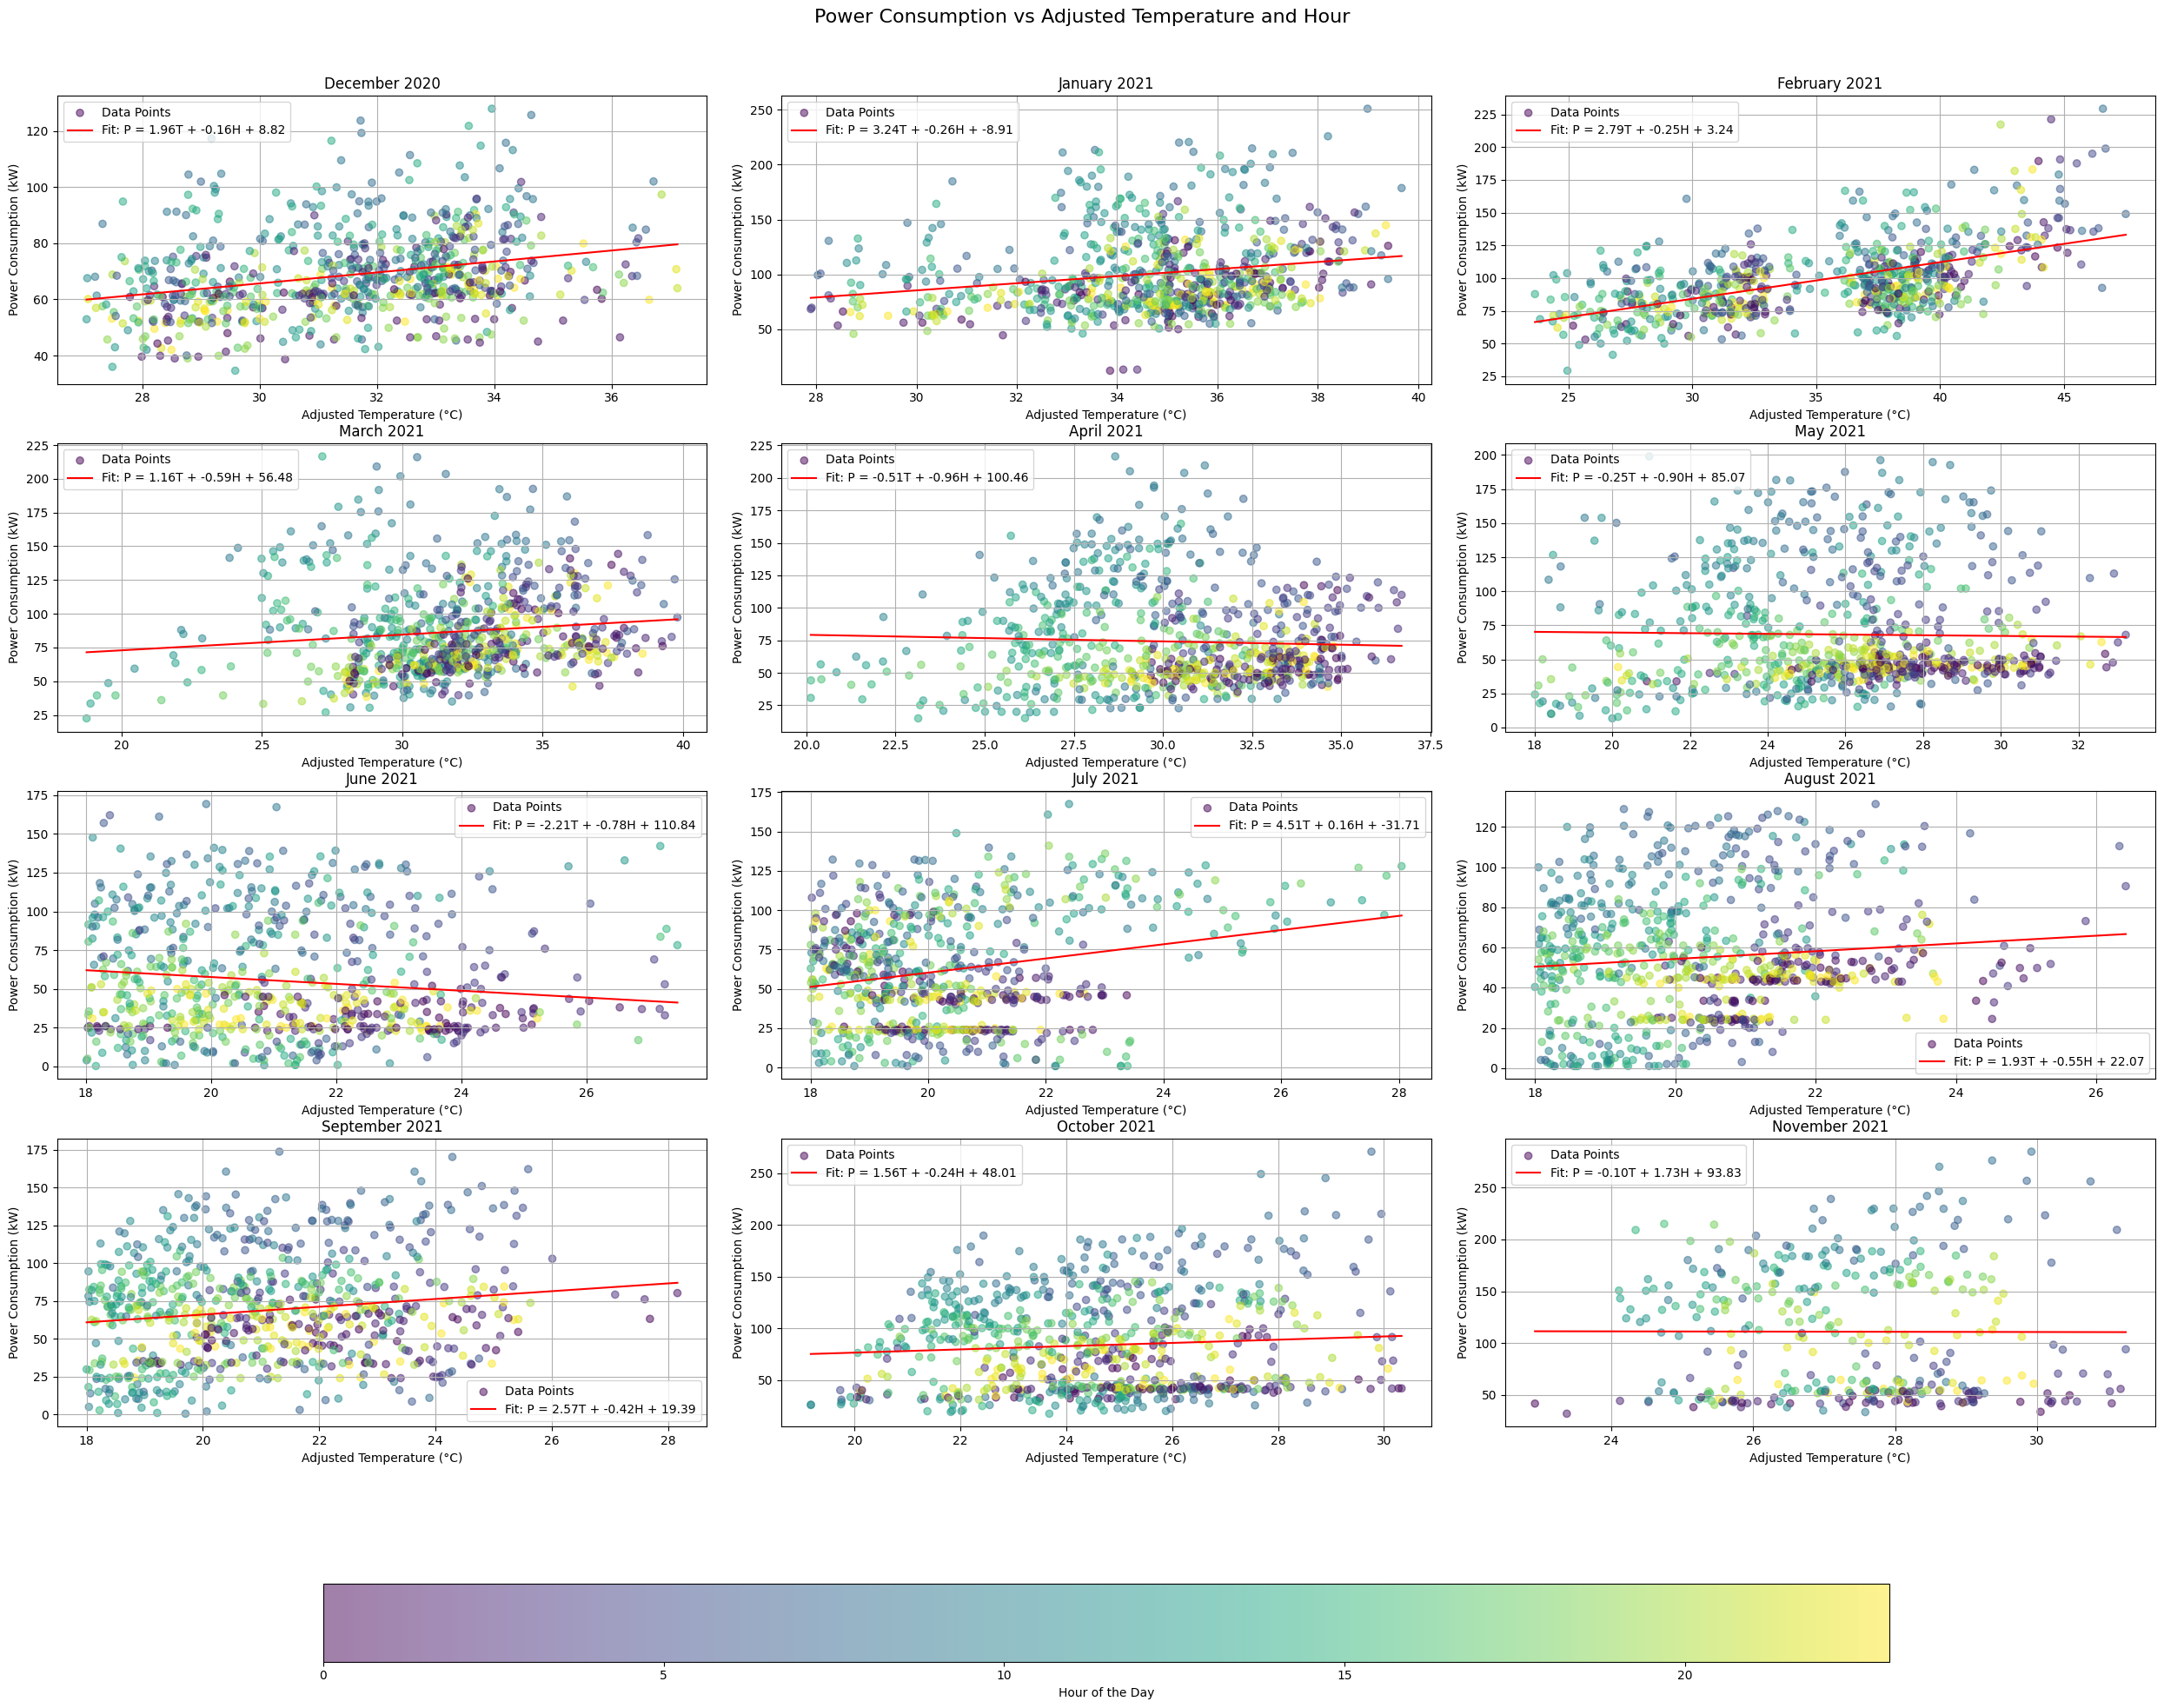

       Month  Hour   R² Score
0    2020-12     0  -1.521312
1    2020-12     1  -6.002507
2    2020-12     2   0.105124
3    2020-12     3   0.138121
4    2020-12     4   0.164891
..       ...   ...        ...
283  2021-11    19  -0.005422
284  2021-11    20  -0.003324
285  2021-11    21  -0.662651
286  2021-11    22  -1.495853
287  2021-11    23 -83.779432

[288 rows x 3 columns]


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df_1h = pd.read_csv('../train_public/1h/L03.B02_1H.csv')
df_weather = pd.read_csv('../train_public/weather/L03_weather_train.csv')

# Ensure 'timestamp' is a datetime object
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Merge dataframes on 'timestamp'
df_merged = pd.merge(df_1h, df_weather, on='timestamp')

# Extract month and hour for grouping
df_merged['month'] = df_merged['timestamp'].dt.to_period('M')
df_merged['hour'] = df_merged['timestamp'].dt.hour

# Drop any rows with missing values
df_merged.dropna(inplace=True)

# Adjust temperature calculation
df_merged['adjusted_temp'] = np.where(
    df_merged['air_temperature_at_2m(deg_C)'] < 18, 
    18 - (df_merged['air_temperature_at_2m(deg_C)'] - 18), 
    df_merged['air_temperature_at_2m(deg_C)']
)

# Create a 4x3 grid of subplots for 12 months
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)
axes = axes.flatten()

# Iterate over each month
r2_scores = []
for i, (month, group) in enumerate(df_merged.groupby('month')):
    if i >= len(axes):  # Prevent index error if there are fewer than 12 months
        break

    X = group[['adjusted_temp', 'hour']]
    y = group['main_meter(kW)']

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # Calculate R² score for each hour
    for hour in range(24):
        hour_group = group[group['hour'] == hour]
        if not hour_group.empty:
            X_hour = hour_group[['adjusted_temp', 'hour']]
            y_hour = hour_group['main_meter(kW)']
            y_pred_hour = model.predict(X_hour)
            r2 = r2_score(y_hour, y_pred_hour)
            r2_scores.append((month, hour, r2))

    # Plot scatter with color representing the hour
    scatter = axes[i].scatter(group['adjusted_temp'], group['main_meter(kW)'], c=group['hour'], cmap='viridis', alpha=0.5, label='Data Points')

    # Add the regression line (since it's now in 2D, we'll use the average hour for the line)
    temp_range = np.linspace(group['adjusted_temp'].min(), group['adjusted_temp'].max(), 100)
    hour_mean = group['hour'].mean()
    y_line = model.predict(np.column_stack([temp_range, np.full(temp_range.shape, hour_mean)]))
    axes[i].plot(temp_range, y_line, color='red', label=f'Fit: P = {model.coef_[0]:.2f}T + {model.coef_[1]:.2f}H + {model.intercept_:.2f}')

    # Set plot titles and labels
    axes[i].set_title(f'{month.strftime("%B %Y")}')
    axes[i].set_xlabel('Adjusted Temperature (°C)')
    axes[i].set_ylabel('Power Consumption (kW)')
    axes[i].legend()
    axes[i].grid(True)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to accommodate the title and colorbar
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle('Power Consumption vs Adjusted Temperature and Hour', fontsize=16)
plt.subplots_adjust(top=0.93)

# Add colorbar for the hour
cbar = fig.colorbar(scatter, ax=axes, orientation='horizontal', fraction=0.05, pad=0.1)
cbar.set_label('Hour of the Day')

plt.show()

# Output R² scores
r2_df = pd.DataFrame(r2_scores, columns=['Month', 'Hour', 'R² Score'])
r2_df.to_csv('r2_scores.csv', index=False)
print(r2_df)

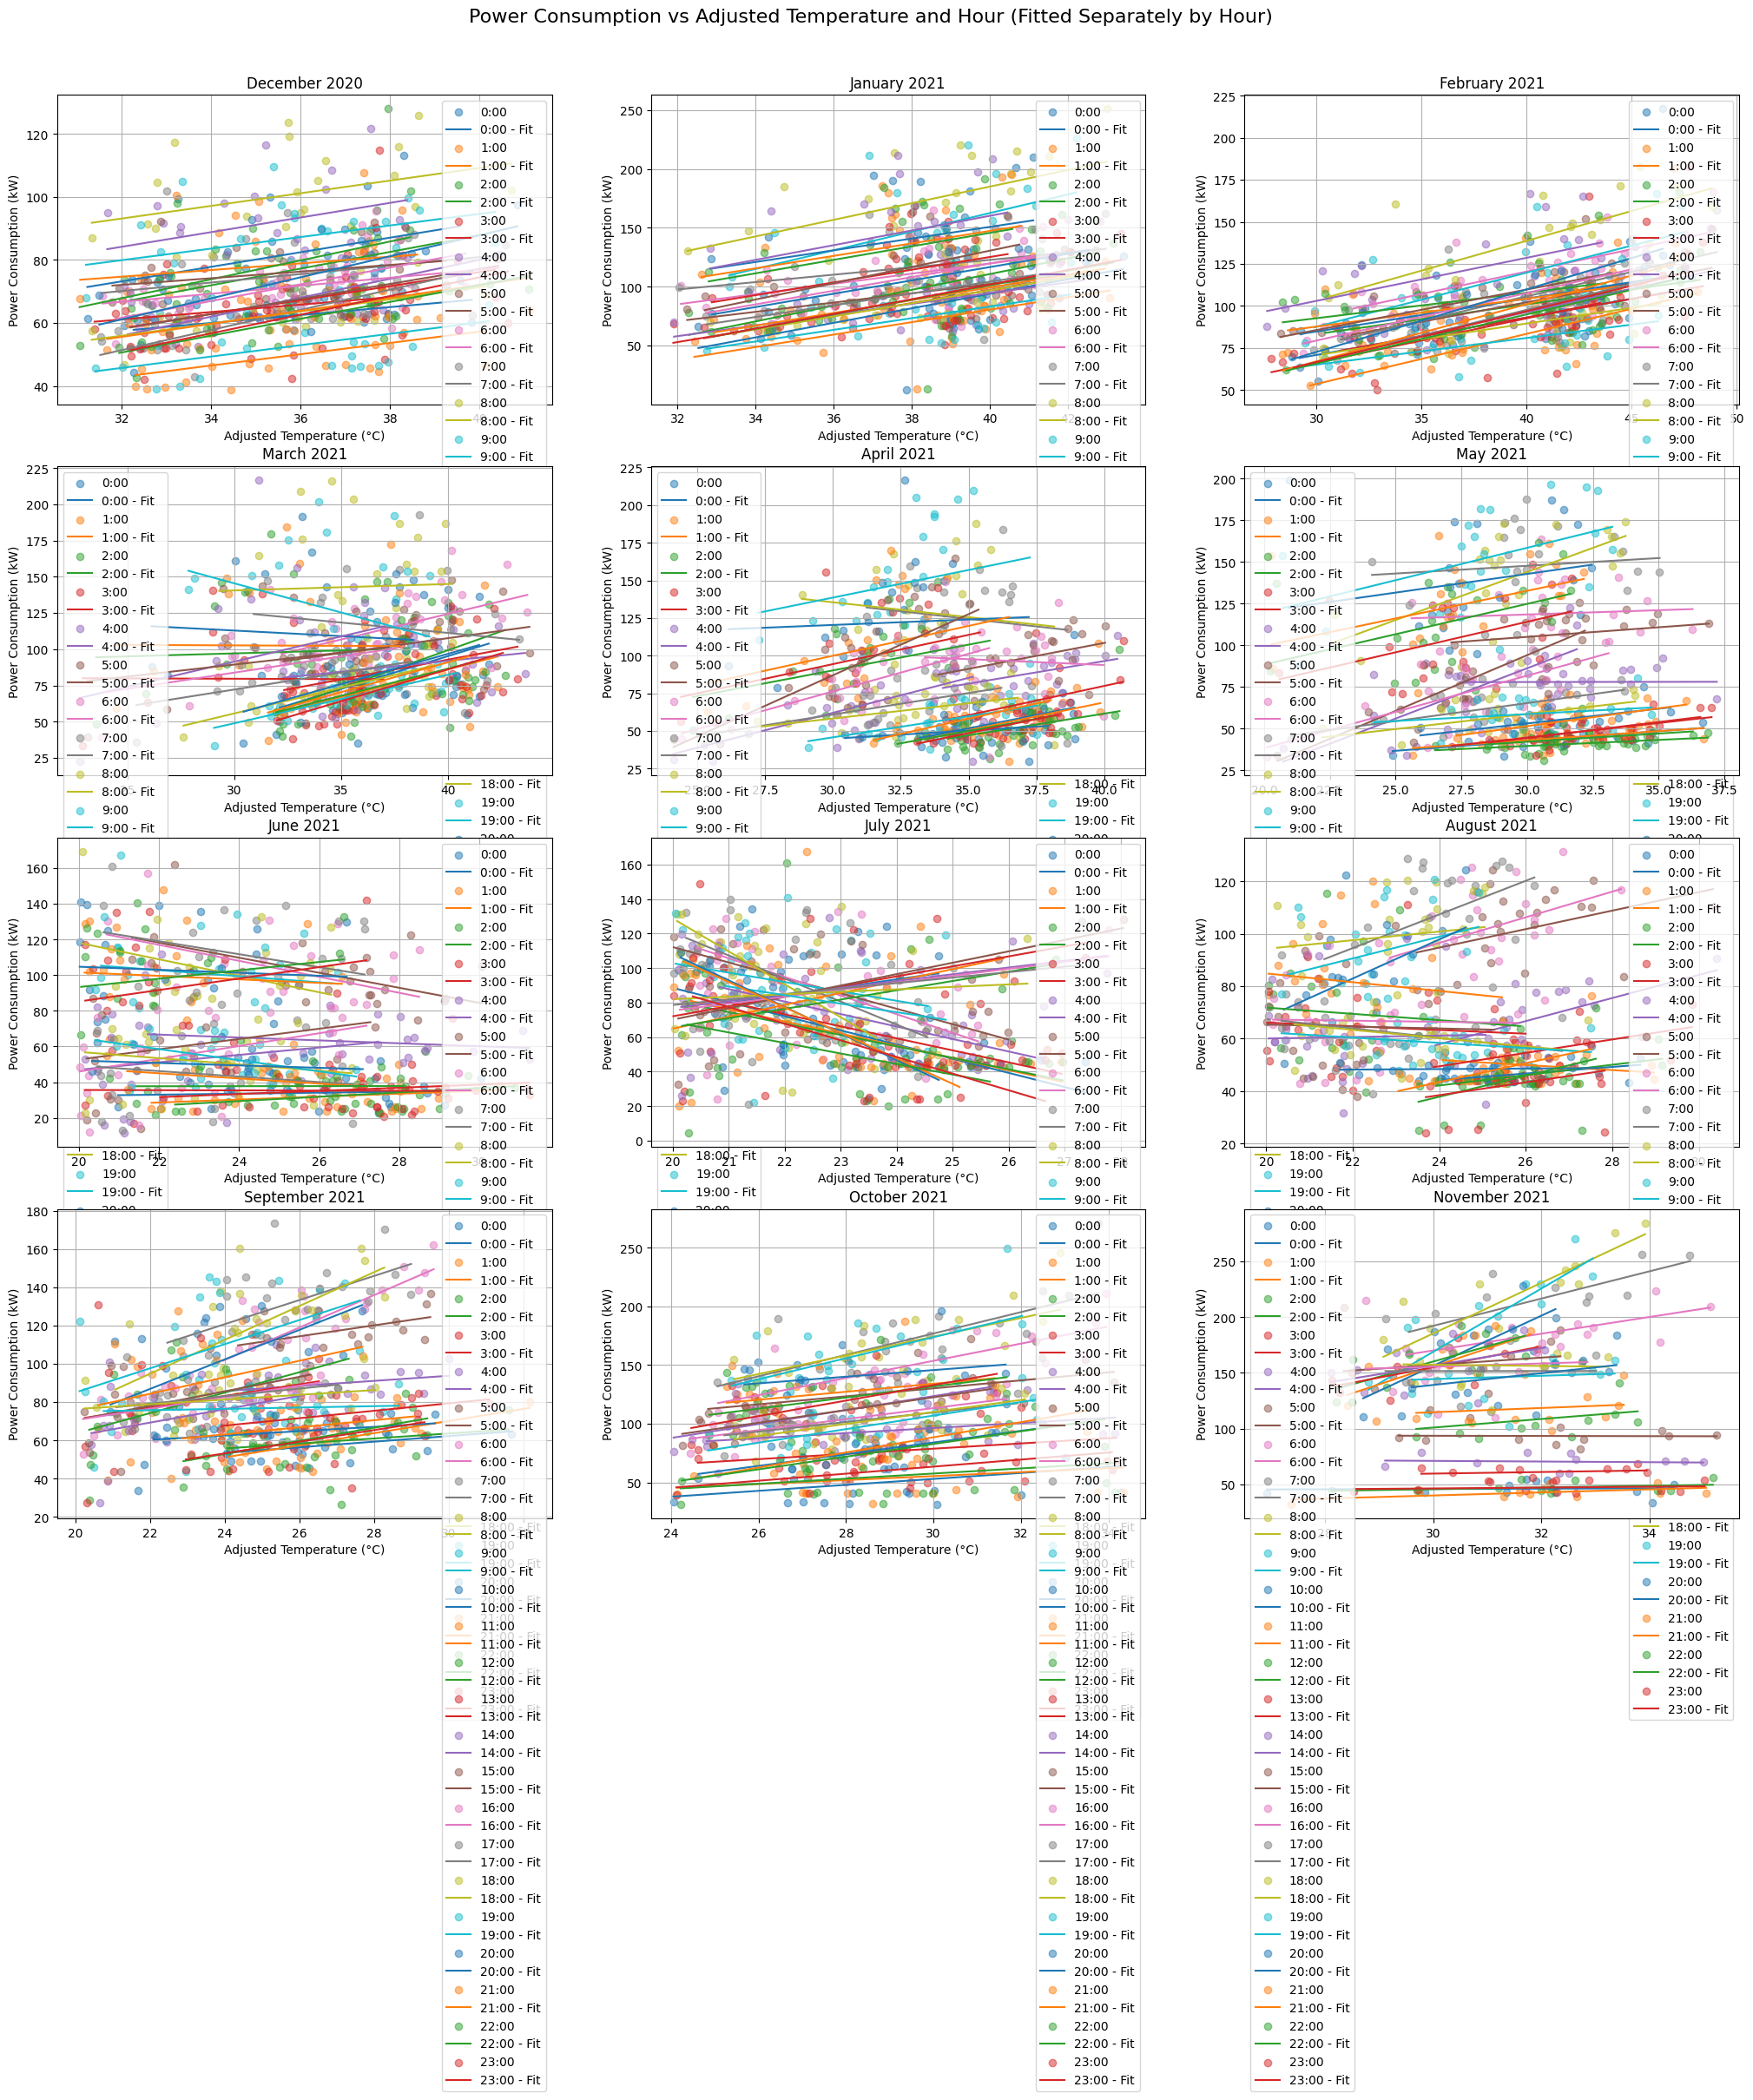

       Month  Hour  R² Score
0    2020-12     0  0.237843
1    2020-12     1  0.186061
2    2020-12     2  0.298222
3    2020-12     3  0.315317
4    2020-12     4  0.475131
..       ...   ...       ...
283  2021-11    19  0.006270
284  2021-11    20  0.084385
285  2021-11    21  0.018536
286  2021-11    22  0.073370
287  2021-11    23  0.041093

[288 rows x 3 columns]


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df_1h = pd.read_csv('../train_public/1h/L03.B02_1H.csv')
df_weather = pd.read_csv('../train_public/weather/L03_weather_train.csv')

# Ensure 'timestamp' is a datetime object
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# # Filter data to include only between 7 AM and 6 PM
# df_1h = df_1h[df_1h['timestamp'].dt.hour.between(6, 21)]
# df_weather = df_weather[df_weather['timestamp'].dt.hour.between(6, 21)]


# Merge dataframes on 'timestamp'
df_merged = pd.merge(df_1h, df_weather, on='timestamp')

# Extract month and hour for grouping
df_merged['month'] = df_merged['timestamp'].dt.to_period('M')
df_merged['hour'] = df_merged['timestamp'].dt.hour
df_merged = df_merged[~df_merged['timestamp'].dt.weekday.isin([5, 6])]

# Drop any rows with missing values
df_merged.dropna(inplace=True)

# Adjust temperature calculation
df_merged['adjusted_temp'] = np.where(
    df_merged['air_temperature_at_2m(deg_C)'] < 20, 
    20 + (20 - df_merged['air_temperature_at_2m(deg_C)']), 
    df_merged['air_temperature_at_2m(deg_C)']
)

# Create a 4x3 grid of subplots for 12 months
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)
axes = axes.flatten()

r2_scores = []

# Iterate over each month
for i, (month, group) in enumerate(df_merged.groupby('month')):
    if i >= len(axes):  # Prevent index error if there are fewer than 12 months
        break
    
    # Iterate over each hour within the month
    for hour in range(24):
        hour_group = group[group['hour'] == hour]
        if hour_group.empty:
            continue
        
        X = hour_group[['adjusted_temp']]
        y = hour_group['main_meter(kW)']

        # Fit a linear regression model for each hour
        model = LinearRegression()
        model.fit(X, y)

        # Predict values
        y_pred = model.predict(X)

        # Calculate R² score for the hour
        r2 = r2_score(y, y_pred)
        r2_scores.append((month, hour, r2))

        # Plot scatter with color representing the hour
        axes[i].scatter(hour_group['adjusted_temp'], hour_group['main_meter(kW)'], alpha=0.5, label=f'{hour}:00')

        # Add the regression line for each hour
        temp_range = np.linspace(hour_group['adjusted_temp'].min(), hour_group['adjusted_temp'].max(), 100)
        y_line = model.predict(temp_range.reshape(-1, 1))
        axes[i].plot(temp_range, y_line, label=f'{hour}:00 - Fit')

    # Set plot titles and labels
    axes[i].set_title(f'{month.strftime("%B %Y")}')
    axes[i].set_xlabel('Adjusted Temperature (°C)')
    axes[i].set_ylabel('Power Consumption (kW)')
    axes[i].legend()
    axes[i].grid(True)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to accommodate the title
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle('Power Consumption vs Adjusted Temperature and Hour (Fitted Separately by Hour)', fontsize=16)
plt.subplots_adjust(top=0.93)

plt.show()

# Output R² scores
r2_df = pd.DataFrame(r2_scores, columns=['Month', 'Hour', 'R² Score'])
r2_df.to_csv('r2_scores.csv', index=False)
print(r2_df)


In [65]:
# sort R² scores by descending order
r2_df.sort_values(by='R² Score', ascending=False, inplace=True)
r2_df.head(20)

Month  Hour  R² Score
272  2021-11     8  0.814220
189  2021-07    21  0.747183
273  2021-11     9  0.691941
135  2021-05    15  0.653502
65   2021-02    17  0.612940
261  2021-10    21  0.598361
49   2021-02     1  0.593304
175  2021-07     7  0.590615
174  2021-07     6  0.584952
274  2021-11    10  0.560129
54   2021-02     6  0.556952
168  2021-07     0  0.554808
20   2020-12    20  0.540246
176  2021-07     8  0.537559
119  2021-04    23  0.537366
262  2021-10    22  0.534689
276  2021-11    12  0.531010
91   2021-03    19  0.528676
271  2021-11     7  0.528156
48   2021-02     0  0.521935

In [66]:
# take mean of R² scores for each hour
r2_df.groupby('Hour')['R² Score'].mean().sort_values(ascending=False)

Hour
21    0.350383
22    0.302505
6     0.285223
23    0.284410
8     0.284269
1     0.247304
0     0.236323
20    0.234415
7     0.230545
17    0.223567
15    0.216652
16    0.214467
3     0.208888
18    0.208834
9     0.200647
5     0.198730
2     0.197466
19    0.188055
4     0.187189
14    0.172816
13    0.144740
12    0.144217
10    0.135706
11    0.109831
Name: R² Score, dtype: float64

In [70]:
# Define the seasons mapping
season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

# Add a 'Season' column to the r2_df
r2_df['Season'] = r2_df['Month'].dt.month.map(season_mapping)

# Group by 'Season' and 'Hour', then calculate the mean R² score
seasonal_r2_mean = r2_df.groupby(['Season', 'Hour'])['R² Score'].mean().reset_index()

seasonal_r2_mean.sort_values(by='R² Score', ascending=False).head(20)

Season  Hour  R² Score
8   Autumn     8  0.517682
89  Winter    17  0.481155
94  Winter    22  0.466703
6   Autumn     6  0.466518
95  Winter    23  0.452407
76  Winter     4  0.422725
7   Autumn     7  0.416504
93  Winter    21  0.409134
92  Winter    20  0.393782
9   Autumn     9  0.392739
90  Winter    18  0.392032
45  Spring    21  0.381777
47  Spring    23  0.375523
69  Summer    21  0.370491
88  Winter    16  0.369360
77  Winter     5  0.367159
72  Winter     0  0.363728
73  Winter     1  0.360593
39  Spring    15  0.352062
75  Winter     3  0.348593

In [68]:
top_hours_by_season = seasonal_r2_mean.groupby('Season').apply(
    lambda x: x.nlargest(3, 'R² Score')
).reset_index(drop=True)

# Print the results
print(top_hours_by_season)

    Season  Hour  R² Score
0   Autumn     8  0.517682
1   Autumn     6  0.466518
2   Autumn     7  0.416504
3   Spring    21  0.381777
4   Spring    23  0.375523
5   Spring    15  0.352062
6   Summer    21  0.370491
7   Summer     6  0.291521
8   Summer     2  0.282481
9   Winter    17  0.481155
10  Winter    22  0.466703
11  Winter    23  0.452407


In [39]:
fgjxffgxggj

NameError: name 'fgjxffgxggj' is not defined

In [ ]:
import os
time = ["1h" , "5min", "15min", "30min"]

for i in time:
    sub_path = f"../train_public_0.6/{i}"

    for file in os.listdir(sub_path):
        
        df = pd.read_csv(os.path.join(sub_path, file))

        df['main_meter(kW)'] = 0.6 * df['main_meter(kW)']
        df['main_meter(kW)'] = df['main_meter(kW)'].clip(lower=0)

        if 'PV_battery_system(kW)' in df.columns:
            df.drop('PV_battery_system(kW)', axis=1, inplace=True)

        df.columns = ['timestamp', 'Temperature_dependent(kW)']

        df.to_csv(os.path.join(sub_path, file), index=False)



In [ ]:
import os
time = ["1h" , "5min", "15min", "30min"]

for i in time:
    sub_path = f"../train_public_0.5/{i}"

    for file in os.listdir(sub_path):
        
        df = pd.read_csv(os.path.join(sub_path, file))

        df['main_meter(kW)'] = 0.5 * df['main_meter(kW)']
        df['main_meter(kW)'] = df['main_meter(kW)'].clip(lower=0)

        # Off on weekends
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df['main_meter(kW)'] = np.where(df['timestamp'].dt.dayofweek.isin([5, 6]), 0, df['main_meter(kW)'])

        if 'PV_battery_system(kW)' in df.columns:
            df.drop('PV_battery_system(kW)', axis=1, inplace=True)

        df.columns = ['timestamp', 'Temperature_dependent(kW)']

        df.to_csv(os.path.join(sub_path, file), index=False)



In [ ]:
import os
time = ["1h" , "5min", "15min", "30min"]

for i in time:
    sub_path = f"../train_public_0.5_offnight/{i}"

    for file in os.listdir(sub_path):
        
        df = pd.read_csv(os.path.join(sub_path, file))

        df['main_meter(kW)'] = 0.5 * df['main_meter(kW)']
        df['main_meter(kW)'] = df['main_meter(kW)'].clip(lower=0)

        # Off on night-time 9pm to 6am
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df['main_meter(kW)'] = np.where(df['timestamp'].dt.hour.between(21, 23), 0, df['main_meter(kW)'])
        df['main_meter(kW)'] = np.where(df['timestamp'].dt.hour.between(0, 6), 0, df['main_meter(kW)'])
        
        if 'PV_battery_system(kW)' in df.columns:
            df.drop('PV_battery_system(kW)', axis=1, inplace=True)

        df.columns = ['timestamp', 'Temperature_dependent(kW)']

        df.to_csv(os.path.join(sub_path, file), index=False)



In [ ]:
## 15236633.356474461